# 단순 선형회귀

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌

In [34]:
# Filtering - 아들의 키

df1 = df[df.Gender == 'M']
df1.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [35]:
# Selection - 아버지와 아들 데이터만 선택

df1 = df[['Father', 'Height']]
df1.head()

,Father,Height
0,78.5,73.2
1,78.5,69.2
2,78.5,69.0
3,78.5,69.0
4,75.5,73.5


In [36]:
# 한 줄로 줄이면

df = df[df.Gender == 'M'][['Father', 'Height']]
df.rename(columns={'Height' : 'Son'}, inplace=True)
df.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [37]:
# inch를 cm으로
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 그리기

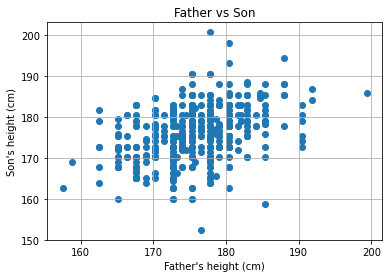

In [38]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선 구하기

In [40]:
weight, bias = np.polyfit(df.Father, df.Son, 1)
weight, bias

(0.44774791760302574, 97.17763700739343)

In [41]:
xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

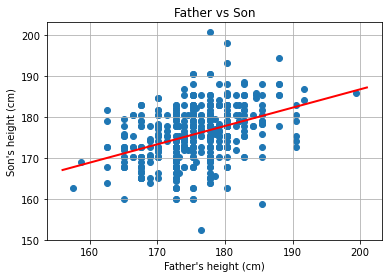

In [46]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=2)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

- Scikit-Learn 으로 회귀식 구하기

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
lr.fit(df.Father.values.reshape(-1,1), df.Son.values)

LinearRegression()

In [52]:
# 기울기, weight
lr.coef_

array([0.44774792])

In [53]:
# 절편, bias
lr.intercept_

97.17763700739347

In [54]:
weight, bias

(0.44774791760302574, 97.17763700739343)

In [55]:
# 잔차 제곱의 합(RSS : Residual sum of square)
lr._residues

17556.59951549399

In [56]:
# R squared - 성능 평가 요소
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.1531292747830697